# Uniamo i dataset

In [4]:
import pandas as pd
import seaborn as sns 
import os
import matplotlib.pyplot as plt


In [5]:
crimes = pd.read_excel("./theft.xlsx")
traffic = pd.read_csv("./chickens.csv")

In [6]:
crimes.columns

Index(['Region', 'Sub Region', 'Country', 'Count', 'Rate', 'Year'], dtype='object')

In [7]:
traffic.columns

Index(['Unnamed: 0', 'Domain Code', 'Domain', 'Area Code', 'Area',
       'Element Code', 'Element', 'Item Code', 'Item', 'Year Code', 'Year',
       'Unit', 'Value', 'Flag', 'Flag Description', 'Value_Extended'],
      dtype='object')

In [8]:
traffic.rename(columns={'Area':'Country'}, inplace=True)

In [9]:
criminal_traffic = traffic.merge(crimes, on=['Country', 'Year'])

In [10]:
criminal_traffic.head(2)

,Unnamed: 0,Domain Code,Domain,Area Code,Country,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Value_Extended,Region,Sub Region,Count,Rate
0,184,TA,Live animals,3,Albania,5609,Import Quantity,1057,Chickens,2010,2010,Head,7738.0,NaN,Official data,7738000.0,Europe,Southern Europe,3978,135.281965
1,192,TA,Live animals,3,Albania,5622,Import Value,1057,Chickens,2010,2010,Dollars,5288.0,NaN,Official data,5288000.0,Europe,Southern Europe,3978,135.281965


## Costruiamo una metrica che tenga conto di 2 valori, al fine di costruire un indice significativo

In [11]:
criminal_traffic['CCM'] = criminal_traffic['Value_Extended'] * criminal_traffic['Count'] / 1000000
criminal_traffic[['Country', 'Year', 'Value_Extended', 'Count', 'CCM']]

,Country,Year,Value_Extended,Count,CCM
0,Albania,2010,7738000.0,3978,30781.764
1,Albania,2010,5288000.0,3978,21035.664
2,Albania,2010,0.0,3978,0.000
3,Albania,2010,0.0,3978,0.000
4,Albania,2011,6901000.0,4621,31889.521
...,...,...,...,...,...
2203,Uruguay,2014,1976000.0,101683,200925.608
2204,Uruguay,2015,454000.0,104443,47417.122
2205,Uruguay,2015,2435000.0,104443,254318.705
2206,Uruguay,2016,414000.0,110401,45706.014


## Concentriamoci sulla quantità di polli ESPORTATI

In [12]:
recent_filter = criminal_traffic['Year'] > 2013
export_filter = criminal_traffic['Element'] == 'Export Quantity'
recent_traffic = criminal_traffic[recent_filter & export_filter]
recent_traffic.head(3)

,Unnamed: 0,Domain Code,Domain,Area Code,Country,Element Code,Element,Item Code,Item,Year Code,...,Unit,Value,Flag,Flag Description,Value_Extended,Region,Sub Region,Count,Rate,CCM
22,204,TA,Live animals,3,Albania,5909,Export Quantity,1057,Chickens,2016,...,Head,115.0,NaN,Official data,115000.0,Europe,Southern Europe,5633,192.443703,647.795
46,1075,TA,Live animals,9,Argentina,5909,Export Quantity,1057,Chickens,2014,...,Head,196.0,NaN,Official data,196000.0,Americas,South America,287063,667.875481,56264.348
50,1076,TA,Live animals,9,Argentina,5909,Export Quantity,1057,Chickens,2015,...,Head,181.0,NaN,Official data,181000.0,Americas,South America,271921,626.289723,49217.701


In [13]:
recent_traffic['Year'].unique() # verifichiamo di avere SOLO gli anni richiesti

array([2016, 2014, 2015])

In [14]:
recent_traffic['Element'].unique() # verifichiamo di avere solo Export

array(['Export Quantity'], dtype=object)

In [15]:
recent_traffic.sort_values(by='CCM', ascending=False)

,Unnamed: 0,Domain Code,Domain,Area Code,Country,Element Code,Element,Item Code,Item,Year Code,...,Unit,Value,Flag,Flag Description,Value_Extended,Region,Sub Region,Count,Rate,CCM
2176,45608,TA,Live animals,231,United States of America,5909,Export Quantity,1057,Chickens,2014,...,Head,90341.0,NaN,Official data,90341000.0,Americas,Northern America,5809100,1828.377919,5.247999e+08
764,17052,TA,Live animals,79,Germany,5909,Export Quantity,1057,Chickens,2016,...,Head,333700.0,NaN,Official data,333700000.0,Europe,Western Europe,1290481,1576.172925,4.306335e+08
760,17051,TA,Live animals,79,Germany,5909,Export Quantity,1057,Chickens,2015,...,Head,292094.0,NaN,Official data,292094000.0,Europe,Western Europe,1348955,1650.950315,3.940217e+08
2184,45610,TA,Live animals,231,United States of America,5909,Export Quantity,1057,Chickens,2016,...,Head,68995.0,NaN,Official data,68995000.0,Americas,Northern America,5638500,1749.839046,3.890283e+08
2180,45609,TA,Live animals,231,United States of America,5909,Export Quantity,1057,Chickens,2015,...,Head,61736.0,NaN,Official data,61736000.0,Americas,Northern America,5723500,1788.989776,3.533460e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042,21912,TA,Live animals,109,Jamaica,5909,Export Quantity,1057,Chickens,2014,...,Head,1.0,NaN,Official data,1000.0,Americas,Caribbean,447,15.617974,4.470000e-01
1406,29397,TA,Live animals,149,Nepal,5909,Export Quantity,1057,Chickens,2016,...,Head,0.0,NaN,Official data,0.0,Asia,Southern Asia,1274,4.396578,0.000000e+00
1840,38322,TA,Live animals,200,Singapore,5909,Export Quantity,1057,Chickens,2014,...,Head,0.0,F,FAO estimate,0.0,Asia,South-Eastern Asia,16182,297.007787,0.000000e+00
1844,38323,TA,Live animals,200,Singapore,5909,Export Quantity,1057,Chickens,2015,...,Head,0.0,F,FAO estimate,0.0,Asia,South-Eastern Asia,15207,274.729543,0.000000e+00


In [16]:
pivot = recent_traffic.pivot_table(index=['Region', 'Country'], columns='Year', values='CCM')
pivot.to_excel('report_pollo_traffico_manigoldi.xlsx')
pivot

Year                        2014         2015         2016
Region  Country                                           
Africa  Burundi            0.807          NaN          NaN
        Kenya           2546.145     3220.789     3180.185
        Madagascar         3.315        4.440          NaN
        Morocco              NaN     1214.925          NaN
        Senegal              NaN       70.084       28.182
...                          ...          ...          ...
Europe  Slovenia       24473.739    24416.658    37291.485
        Spain        2987067.720  4564380.184  4330835.889
        Sweden       1798242.150  1547029.666  2208454.668
        Switzerland   234777.152   212972.748   238350.189
Oceania Australia      56768.936    93716.058   128167.704

[69 rows x 3 columns]

## Creiamo la documentazione per gli agenti segreti
Avremo cartelle contenenti la documentazione divisa per continente, sia dati grezzi che dati elaborati.

In [17]:
# raggruppiamo i dati per continente
# i sottogruppi sono dei DATAFRAME
agents = recent_traffic.groupby('Region')
agents

folder Africa already exists. Overwriting files


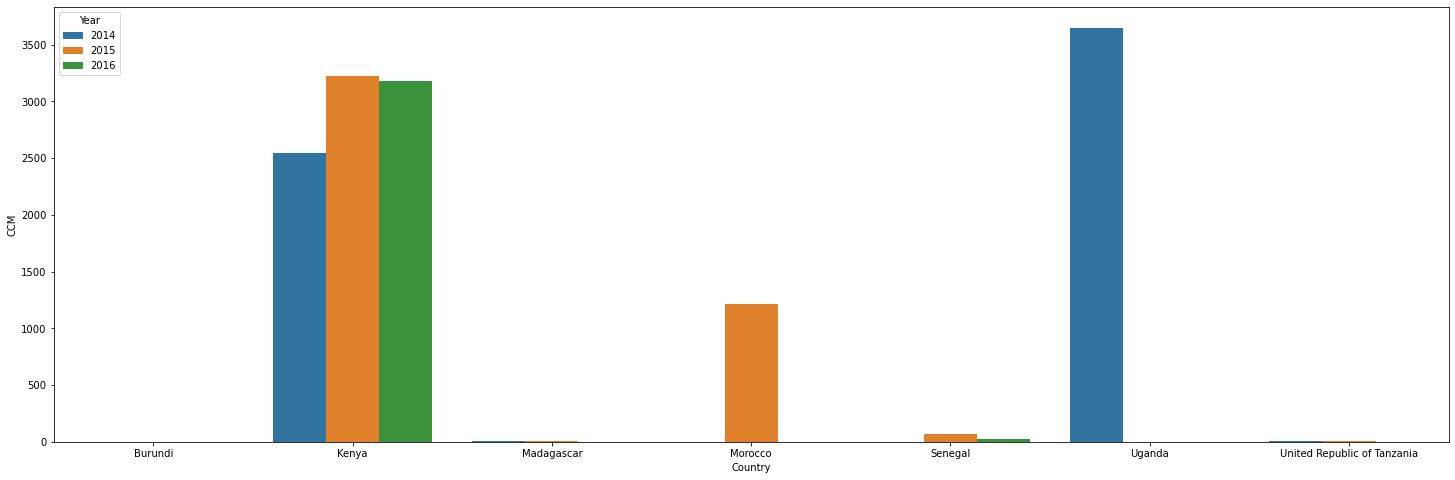

folder Americas already exists. Overwriting files


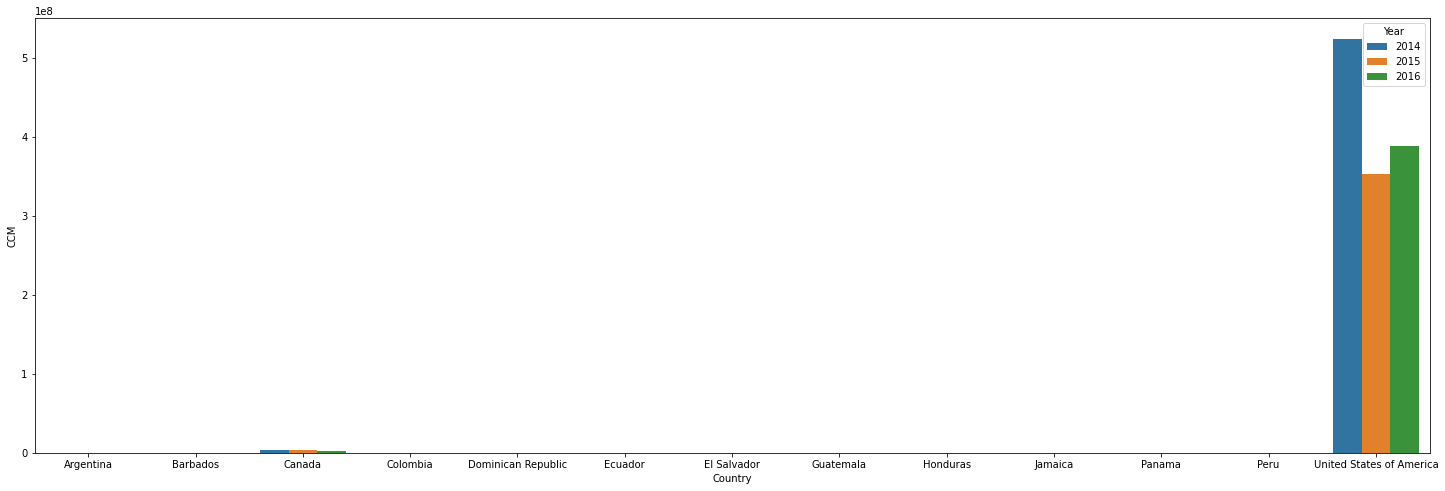

folder Asia already exists. Overwriting files


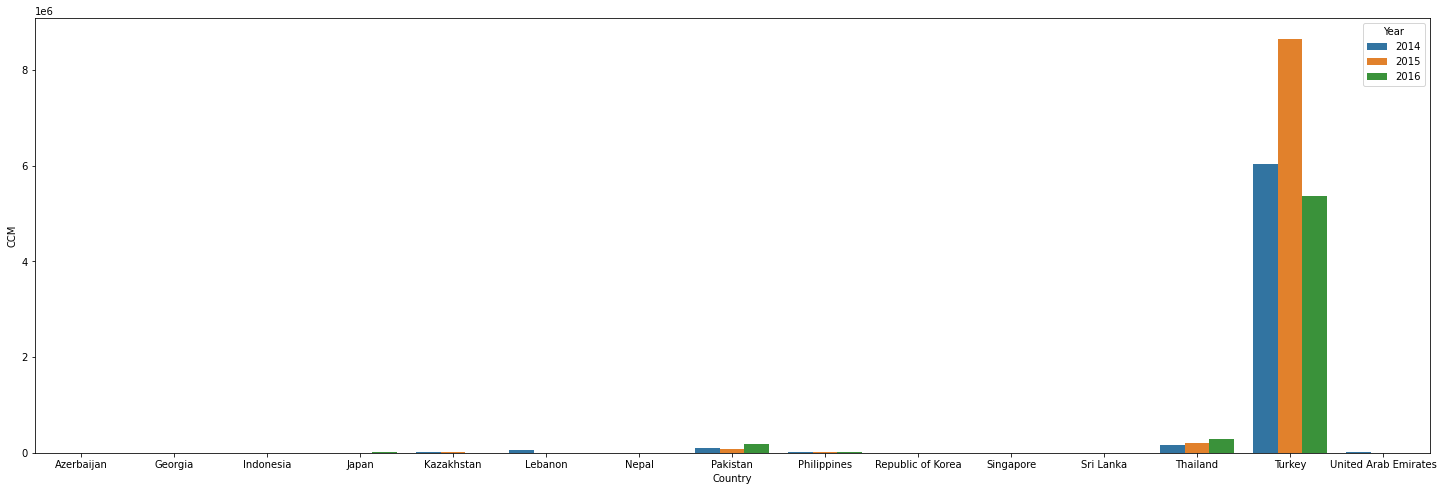

folder Europe already exists. Overwriting files


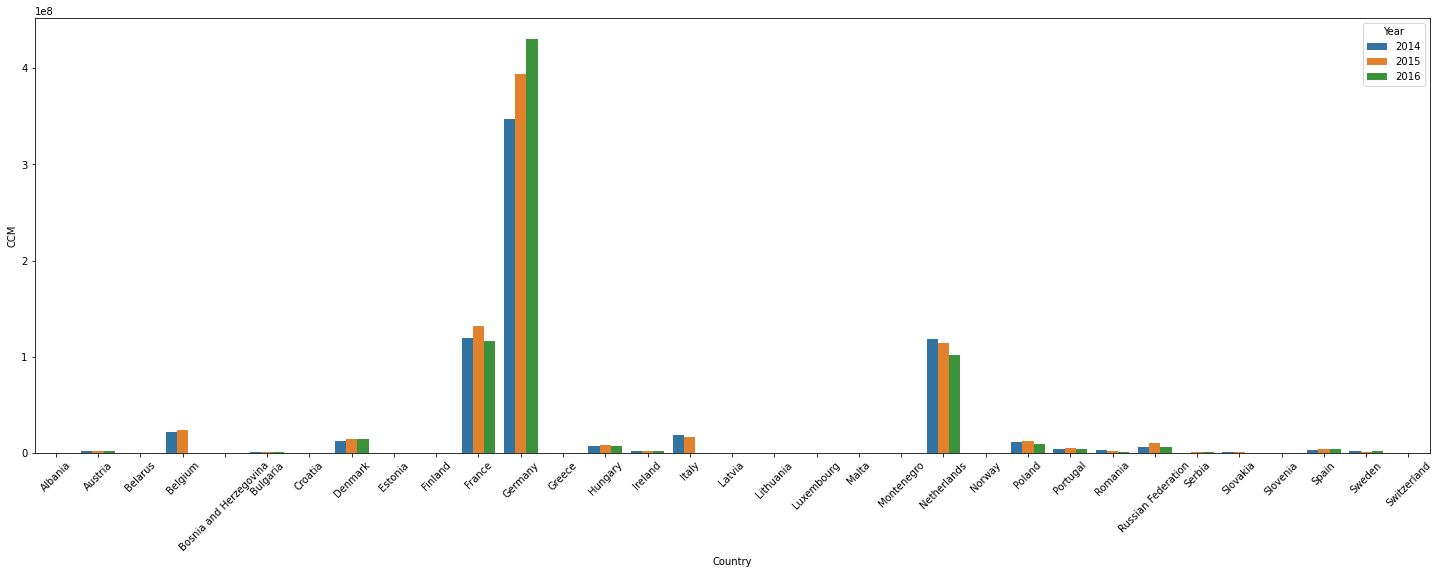

folder Oceania already exists. Overwriting files


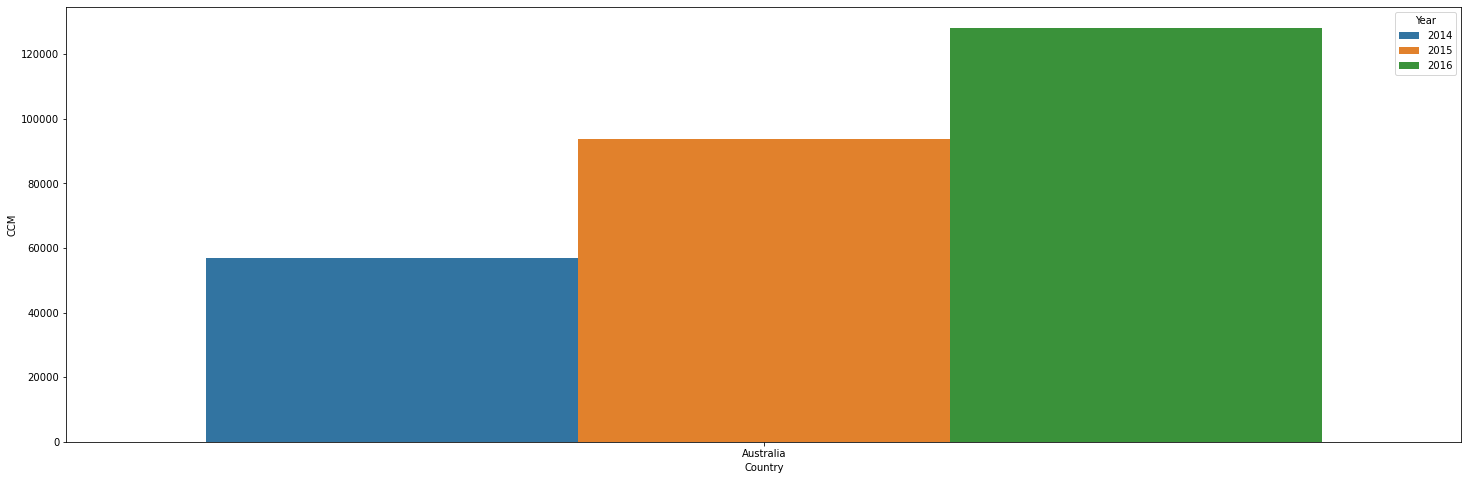

In [25]:
for name, group in agents: # name il continente, group il dataframe dei paesi
    try:
        os.mkdir(name)
    except:
        print(f'folder {name} already exists. Overwriting files')
    
    group.to_csv(name + '/raw.csv')
    g_pivot = group.pivot_table(
        index=['Sub Region', 'Country'],
        columns='Year', 
        values=['CCM', 'Count', 'Value_Extended'],
        margins=True)
    g_pivot.to_excel(name + '/pivot.xlsx')

    plt.figure(figsize=(25,8))
    chart = sns.barplot(data=group, x='Country', y='CCM', hue='Year')
    if name == 'Europe':
        chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

    plt.savefig(name + '/plot.jpg')
    plt.show()

